In [ ]:
#https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b?fbclid=IwAR1zkcTv6ddYAByvRlOonQPFtagcaM47aX_dyAMjAeNasW3Nr8BVaK-7zCU

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Loading data from bitcoin api

In [68]:
import requests, json
api = 'https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=2000'
request = requests.get(api)
hist = pd.DataFrame(json.loads(request.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
hist.head()

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2013-11-26,969.96,974.96,825.08,829.99,31613.86,28285852.13
2013-11-27,1079.89,1094.78,914.27,969.96,37859.08,37868643.04
2013-11-28,1101.38,1224.48,1032.06,1079.89,37396.83,42912383.44
2013-11-29,1206.93,1241.92,1049.96,1101.38,38706.56,45030632.96
2013-11-30,1205.66,1232.94,1150.16,1206.93,15096.04,18266602.22


In [72]:
y = hist['close'].resample('MS').mean()


In [73]:
y['2017':]


time
2017-01-01      909.679355
2017-02-01     1061.324643
2017-03-01     1129.273871
2017-04-01     1215.241000
2017-05-01     1877.569677
2017-06-01     2632.285667
2017-07-01     2525.737097
2017-08-01     3878.901935
2017-09-01     4095.673000
2017-10-01     5351.401290
2017-11-01     7771.936000
2017-12-01    15034.531613
2018-01-01    12953.928710
2018-02-01     9410.401071
2018-03-01     9002.888710
2018-04-01     8042.367000
2018-05-01     8437.831613
2018-06-01     6777.438333
2018-07-01     7128.142903
2018-08-01     6688.295484
2018-09-01     6597.084000
2018-10-01     6479.654516
2018-11-01     5403.302667
2018-12-01     3713.890000
2019-01-01     3698.831613
2019-02-01     3690.753214
2019-03-01     3949.388387
2019-04-01     5167.444000
2019-05-01     6680.921579
Freq: MS, Name: close, dtype: float64

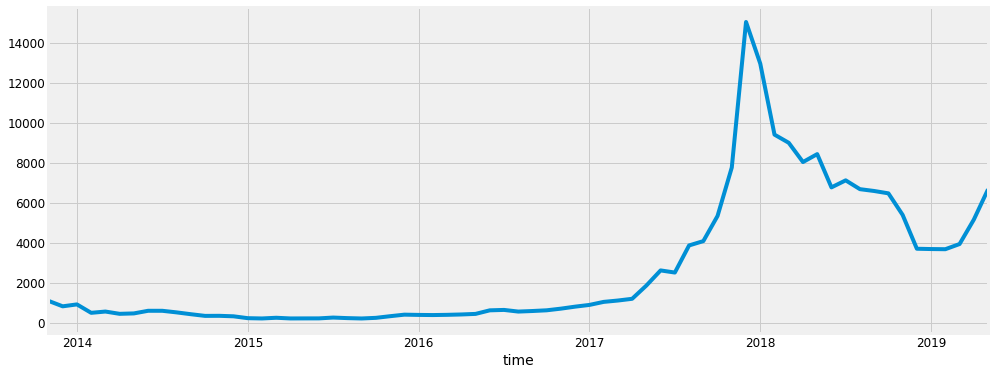

In [74]:

y.plot(figsize=(15, 6))
plt.show()

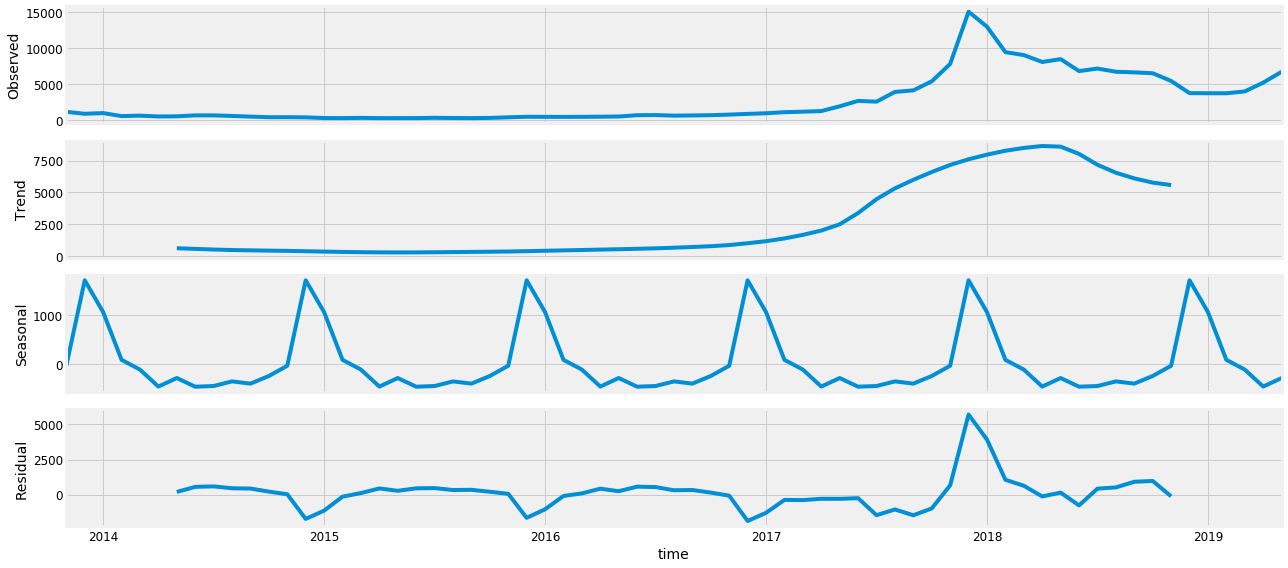

In [75]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [76]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [77]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1294.4655761047568
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1057.335883990942
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1060.0007069738513
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:830.7058034065882
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1073.6497306409362
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1045.3619037968865
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:849.1953165061084
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:825.86160279229
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1203.1746507852456
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:985.753163212968
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1003.3799768292135
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:771.7050502934277
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1019.4557698795853
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:984.9827513211293
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:816.2053320144433
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:781.1936262988534
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1107.425231356248
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:914.1625938432929
ARIMA(

In [78]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6468      0.429     -1.508      0.131      -1.487       0.194
ma.L1          0.8158      0.374      2.179      0.029       0.082       1.549
ar.S.L12      -1.2246      0.588     -2.081      0.037      -2.378      -0.071
sigma2      2.001e+06   2.38e+05      8.417      0.000    1.53e+06    2.47e+06


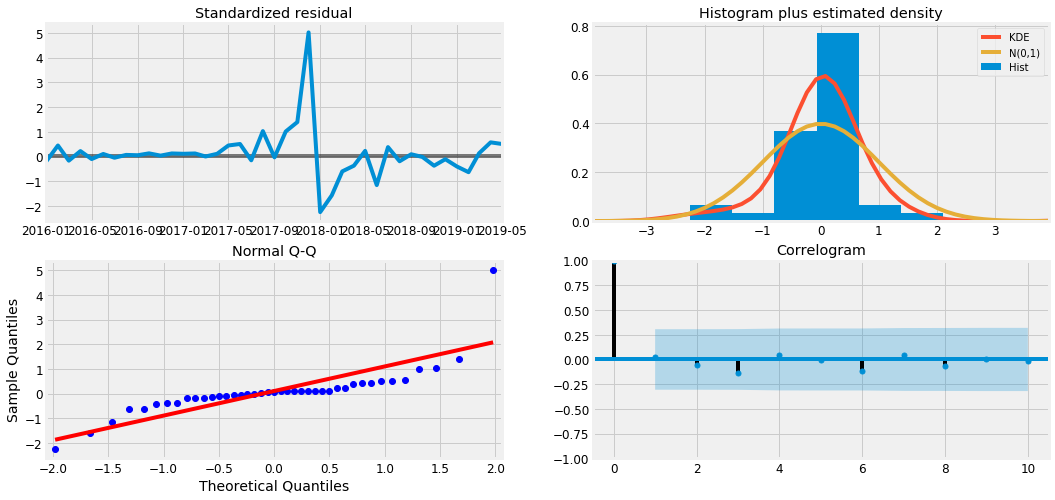

In [79]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

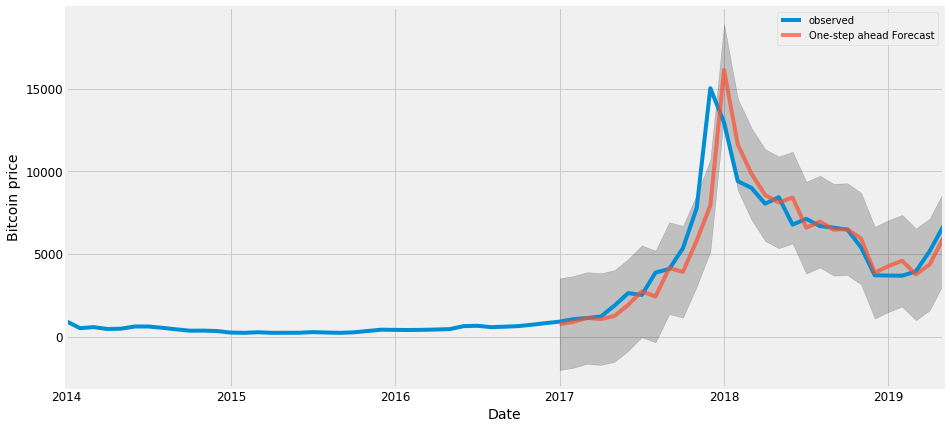

In [86]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin price')
plt.legend()

plt.show()

In [81]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
# Undersøg dette
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2804889.32


In [82]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
# Og dette


The Root Mean Squared Error of our forecasts is 1674.78


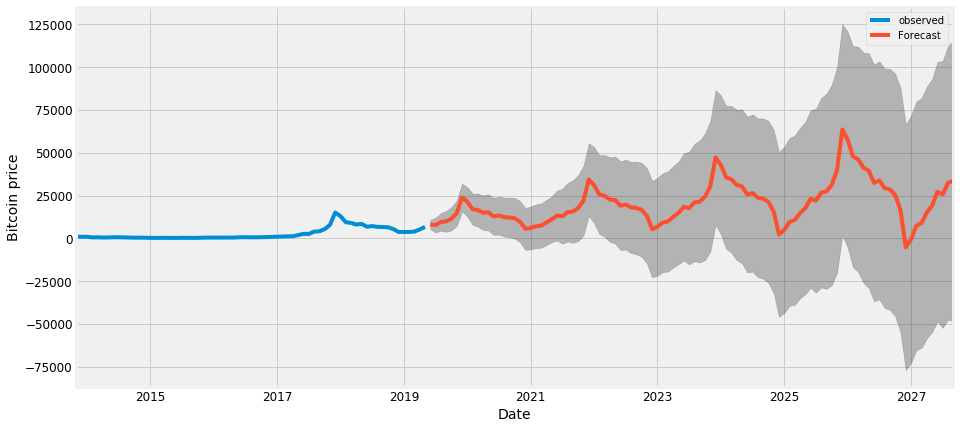

In [94]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin price')

plt.legend()
plt.show()